In [1]:
#1.TASK-1.

import pandas as pd
import numpy as np

# Create a sample dataset
np.random.seed(42)
data = pd.DataFrame({
    'Study Hours': np.random.randint(1, 20, 100),
    'Attendance': np.random.randint(50, 100, 100)
})

# Assume: Pass if Study Hours >10 or Attendance >75

data['Pass'] = ((data['Study Hours'] > 10) | (data['Attendance'] > 75)).astype(int)
df=pd.DataFrame(data)
print(df.head())

   Study Hours  Attendance  Pass
0            7          71     0
1           15          76     1
2           11          84     1
3            8          50     0
4            7          84     1


2. Data Exploration:

Missing values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64


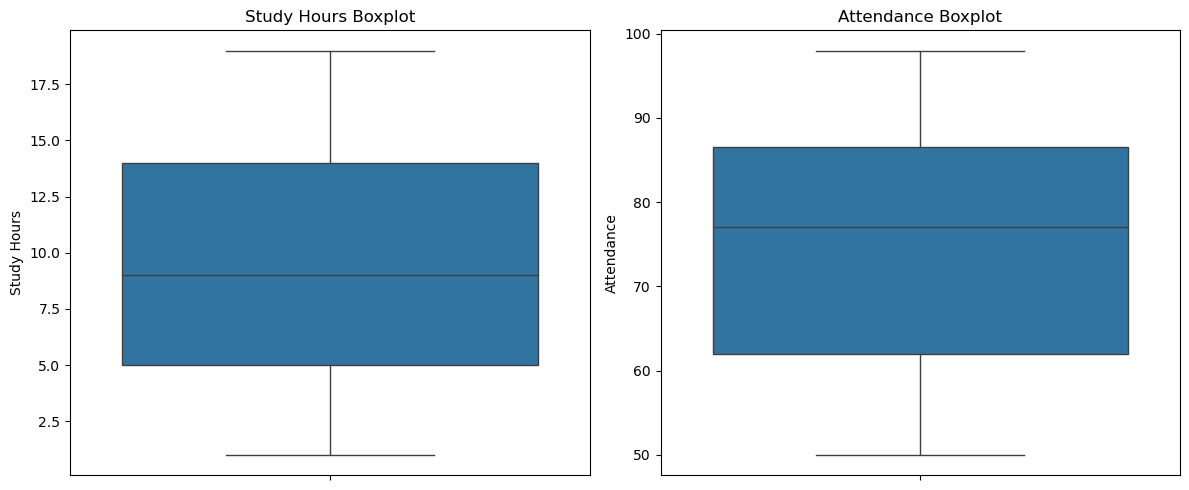

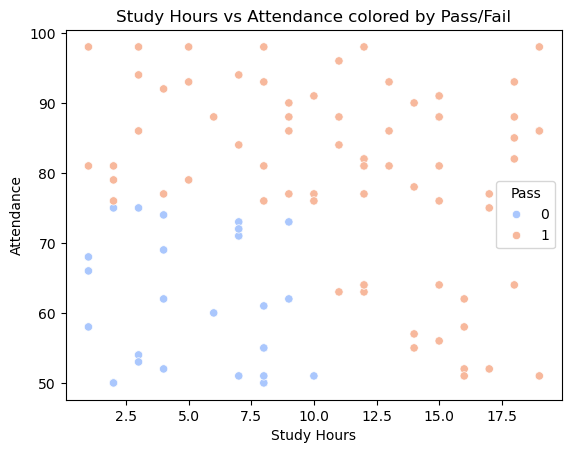

In [2]:
# 1. Missing values
print("Missing values:\n", data.isnull().sum())


# 2. Boxplots
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Study Hours'])
plt.title('Study Hours Boxplot')
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Attendance'])
plt.title('Attendance Boxplot')
plt.tight_layout()
plt.show()

# 3. Scatter plot by Pass
sns.scatterplot(x='Study Hours', y='Attendance', hue='Pass', data=data, palette='coolwarm')
plt.title('Study Hours vs Attendance colored by Pass/Fail')
plt.show()


3. Model Training:


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Split
X = data[['Study Hours', 'Attendance']]
y = data['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

4. Model Evaluation:

Accuracy: 0.90


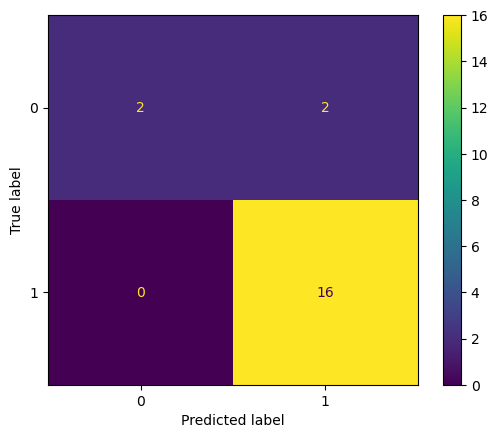

In [4]:
# Predict
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [5]:
coeff_df = pd.DataFrame({
    'Feature': ['Study Hours', 'Attendance'],
    'Coefficient': model.coef_[0]
})
print(coeff_df)


       Feature  Coefficient
0  Study Hours     0.643907
1   Attendance     0.273876


TASK-2.


1. Load and Preprocess the Dataset:


In [6]:
data2 = pd.DataFrame({
    'Review Text': [
        "I love this product, it's amazing!",
        "Very bad experience, hate it.",
        "Fantastic quality, will buy again.",
        "Not good, waste of money.",
        "Absolutely wonderful service.",
        "Terrible, broke after one use."
    ],
    'Sentiment': ['positive', 'negative', 'positive', 'negative', 'positive', 'negative']
})
df=pd.DataFrame(data2)
print(df.head())

                          Review Text Sentiment
0  I love this product, it's amazing!  positive
1       Very bad experience, hate it.  negative
2  Fantastic quality, will buy again.  positive
3           Not good, waste of money.  negative
4       Absolutely wonderful service.  positive


In [7]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Important for lemmatizer synonyms


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bhava\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("running"))  # Should print: running
print(lemmatizer.lemmatize("batteries", pos="n"))  # Should print: battery


running
battery


In [10]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.strip()
    if text == "":
        return ""
    text = text.lower()
    try:
        words = nltk.word_tokenize(text)
    except LookupError:
        # fallback if tokenizer ever fails
        return ""
    words = [w for w in words if w.isalpha() and w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)


In [12]:
# Fill any NaNs robustly and enforce string
data2['Review Text'] = data2['Review Text'].fillna("").astype(str)

# Now process
cleaned_reviews = []
for text in data2['Review Text']:
    cleaned_reviews.append(preprocess_text(text))

data2['Cleaned Review'] = cleaned_reviews


In [13]:
for i, text in enumerate(data2['Review Text']):
    try:
        cleaned = preprocess_text(text)
        cleaned_reviews.append(cleaned)
    except Exception as e:
        print(f"Failed on row {i}: {text}")
        print("Error:", e)


In [14]:
# Print first few rows to see the results
print(data2[['Review Text', 'Cleaned Review']].head(10))


                          Review Text Cleaned Review
0  I love this product, it's amazing!               
1       Very bad experience, hate it.               
2  Fantastic quality, will buy again.               
3           Not good, waste of money.               
4       Absolutely wonderful service.               
5      Terrible, broke after one use.               


In [15]:
print(data2['Cleaned Review'].head(10))
print("\nAny empty values?", (data2['Cleaned Review'].str.strip() == "").sum())


0    
1    
2    
3    
4    
5    
Name: Cleaned Review, dtype: object

Any empty values? 6


In [16]:
data2 = data2[~data2['Cleaned Review'].isnull()]  # remove actual NaN
data2 = data2[data2['Cleaned Review'].str.strip() != ""]


In [17]:
print("Remaining rows after cleaning:", data2.shape[0])


Remaining rows after cleaning: 0


In [18]:
print("Any missing sentiment?", data2['Sentiment'].isnull().sum())
print("Unique sentiments:", data2['Sentiment'].unique())


Any missing sentiment? 0
Unique sentiments: []


In [19]:
print(data2.head())
print(data2['Cleaned Review'].tolist())


Empty DataFrame
Columns: [Review Text, Sentiment, Cleaned Review]
Index: []
[]


In [20]:
data2['Cleaned Review'] = data2['Cleaned Review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))


In [21]:
data2 = data2[data2['Cleaned Review'].str.strip() != ""]
data2 = data2.reset_index(drop=True)


In [34]:
#  Print check
print("Sample Cleaned Reviews:", data2['Cleaned Review'].head(5).tolist())


Sample Cleaned Reviews: []


In [23]:
for i, val in enumerate(data2['Review Text'].head(20)):
    print(f"Row {i}: {repr(val)} type: {type(val)}")


In [24]:
# Fix lists, NaNs, numbers
data2['Review Text'] = data2['Review Text'].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else str(x) if x is not None else ""
)


In [25]:
print("Sample cleaned reviews:")
print(data2[['Review Text', 'Cleaned Review']].head(10))


Sample cleaned reviews:
Empty DataFrame
Columns: [Review Text, Cleaned Review]
Index: []


2. Text Vectorization:


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Sample text data and labels
documents = [
    "I loved the product, it was amazing!",
    "Horrible experience, would not recommend.",
    "Absolutely fantastic quality, very happy.",
    "Terrible service, I'm very disappointed.",
    "Pretty good, I liked it.",
    "Not great, will not buy again."
]

labels = ['positive', 'negative', 'positive', 'negative', 'positive', 'negative']

#  Vectorize using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
y = labels

print("CountVectorizer shape:", X.shape)




CountVectorizer shape: (6, 26)


3. Model Training:

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Sample text data and labels
documents = [
    "I loved the product, it was amazing!",
    "Horrible experience, would not recommend.",
    "Absolutely fantastic quality, very happy.",
    "Terrible service, I'm very disappointed.",
    "Pretty good, I liked it.",
    "Not great, will not buy again."
]

labels = ['positive', 'negative', 'positive', 'negative', 'positive', 'negative']
# Train/test split & model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
    positive       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [31]:
documents = data2['Cleaned Review'].tolist()
labels = data2['Sentiment'].tolist()



4. Model Evaluation:

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Print individual metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


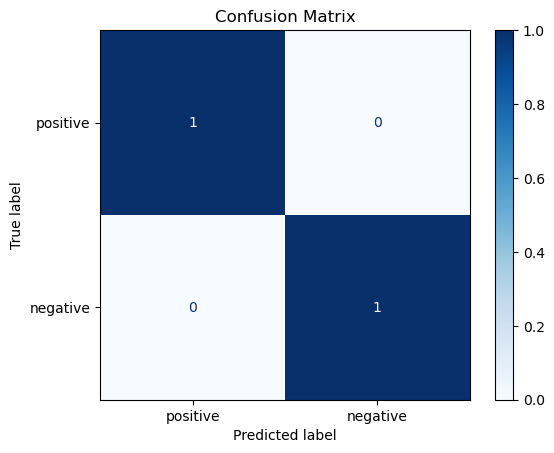

In [ ]:
#Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "negative"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
